In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def calculate_S(P_plus, P_minus, N):
    diff = (P_plus-P_minus)*np.sqrt(N)
    P = (P_plus+P_minus)/2
    denom = np.sqrt(2*P*(1-P))
    denom[denom==0]=1
    return diff/denom

In [3]:
data = pd.read_csv('SNP_status.txt', delim_whitespace=True, low_memory=False)
df = pd.DataFrame(data)

In [4]:
case = df[df['Status']=='Case']
case = case.drop('Status', 1)
control = df[df['Status']=='Control']
control = control.drop('Status', 1)

In [5]:
P_plus = case.sum()/2000
P_minus = control.sum()/2000

In [7]:
S = calculate_S(P_plus, P_minus, 2000)
_S = [-s if s>0 else s for s in S]
pvalue = stats.norm.cdf(_S)*2

In [7]:
alpha = 0.05/100000
threshold = stats.norm.ppf(alpha/2)
sig_snp_index = np.where(_S<threshold)
sig_snp = sig_snp_index[0].tolist()

In [8]:
S2 = S**2
chi_stat = stats.chi2.median(df=1)
lambda_gc = np.median(S2)/chi_stat

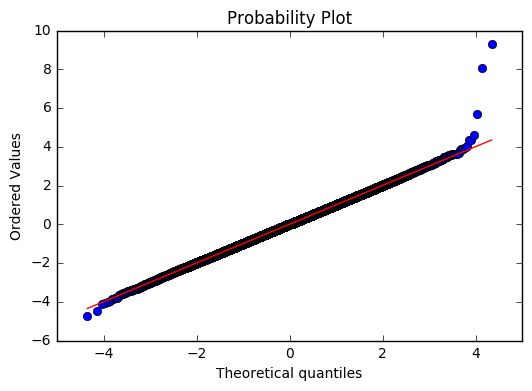

In [9]:
stats.probplot(S, plot=plt)
plt.show()

In [11]:
fout = open('result.txt', 'w+')
header = 'UID:304743326\n'+'email:a5834929@gmail.com\n'+'Undergrad or Grad:Grad\n'
fout.write(header+'<A>\n')
for i in range(len(pvalue)):
    fout.write('SNP%05d:%.10f\n' % (i, pvalue[i]))
fout.write('</A>\n<B>\n')
for i in sig_snp:
    fout.write('SNP%05d\n' % i)
fout.write('</B>\n<C>\nLambda_gc:%.10f\n</C>' % lambda_gc)
fout.close()